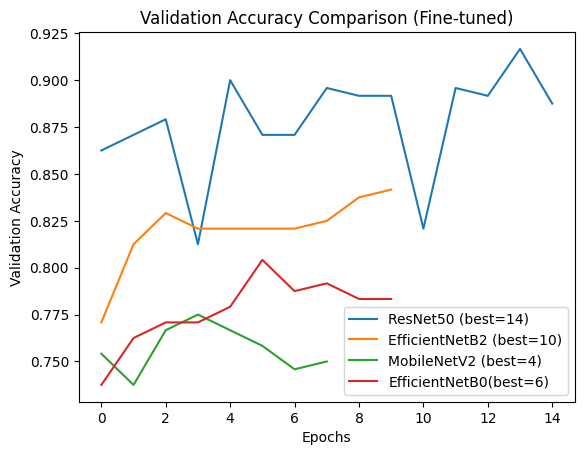

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_history(path):
    with open(path, "r") as f:
        return json.load(f)

resnet = load_history("../history/resnet_history.json")
effb2  = load_history("../history/efficientnetb2_history.json")
mnet   = load_history("../history/mobilenetv2_history.json")
effb0     = load_history("../history/efficientnetb0_history.json")

def best_epoch(h):
    return np.argmax(h['val_accuracy']) + 1


plt.figure()
plt.plot(resnet['val_accuracy'], label=f"ResNet50 (best={best_epoch(resnet)})")
plt.plot(effb2['val_accuracy'], label=f"EfficientNetB2 (best={best_epoch(effb2)})")
plt.plot(mnet['val_accuracy'], label=f"MobileNetV2 (best={best_epoch(mnet)})")
plt.plot(effb0['val_accuracy'], label=f"EfficientNetB0(best={best_epoch(effb0)})")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison (Fine-tuned)")
plt.legend()
plt.show()


In [3]:
import pandas as pd

def row(name, h):
    b = np.argmax(h['val_accuracy'])
    return {
        "Model": name,
        "Best Epoch": b + 1,
        "Train Acc": h['accuracy'][b],
        "Val Acc": h['val_accuracy'][b],
        "Val Loss": h['val_loss'][b]
    }

df = pd.DataFrame([
    row("ResNet50", resnet),
    row("EfficientNetB2", effb2),
    row("MobileNetV2", mnet),
    row("EfficientNetB0", effb0)
])

df


,Model,Best Epoch,Train Acc,Val Acc,Val Loss
0,ResNet50,14,0.961995,0.916667,0.304088
1,EfficientNetB2,10,0.881235,0.841667,0.442586
2,MobileNetV2,4,0.754157,0.775000,0.587149
3,EfficientNetB0,6,0.766033,0.804167,0.789934
